# Lab 8: Use PCA for exploratory data analysis

*PCA: Principal Component Analysis*

In this lab:
* Visualize how PCA works on a small, 2-dimensional dataset. Not every projection is "good".
* Visualize how a 3-dimensional data can also be contained in a 2-dimensional subspace.
* Use PCA to find hidden patterns in a high-dimensional dataset.

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

from lib.pca_utils import plot_widget

from bokeh.io import show, output_notebook
from bokeh.plotting import figure

import matplotlib.pyplot as plt
import plotly.offline as py

In [3]:
py.init_notebook_mode()

In [4]:
output_notebook()

Loading BokehJS ...

## I. Example from course lecture

### Load data & Perform feature scaling

*feature scaling: Scale the features so that the range of all features is similar.*

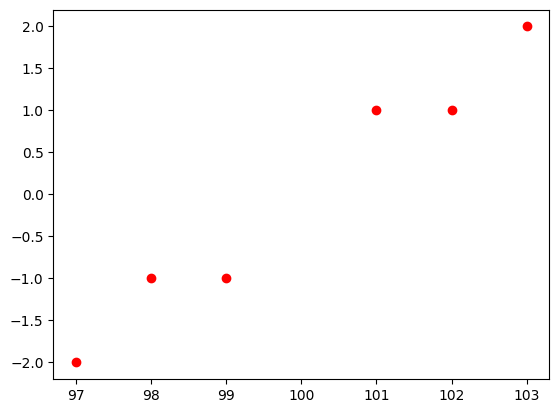

In [5]:
# Load 2D dataset
# This is a simple example so feature scaling is omitted, but normally that should be performed before fitting the data. 

X = np.array([[ 99,  -1],
       [ 98,  -1],
       [ 97,  -2],
       [101,   1],
       [102,   1],
       [103,   2]])

plt.plot(X[:,0], X[:,1], 'ro')

### Mean normalization & Fit the data

* Use the `fit()` method to fit the dataset into 2-3 axes (principal components).
* This method performs mean normalization (recalculates datapoints such that all features have mean = 0) so we do not need to do it in a separate step.

In [6]:
# Define a 2 dimenstional PCA  algorithm (same number of dimensions as the original dataset
pca_2 = PCA(n_components=2)
pca_2

PCA(n_components=2)

In [7]:
# Fit the data
# sklearn's .fit() method includes mean normalization
# mean normilzation = tranforming the data so that the mean of every feature is 0
pca_2.fit(X)

PCA(n_components=2)

### Examine how much variance/info is explained by each principal component

In [8]:
pca_2.explained_variance_ratio_

# Expected value: array([0.99244289, 0.00755711])

# This means that the coordinates on the first principal component (first axis) are enough to retain 99.24% of the information ("explained variance"). 
# The second principal component adds an additional 0.76% of the information ("explained variance") that is not stored in the first principal component coordinates.

array([0.99244289, 0.00755711])

In [9]:
X_trans_2 = pca_2.transform(X)
X_trans_2

# Expected output
# column 1: coordinates along the first principal component (the first new axis)
# column 2: coordinates along the second principal component (the second new axis)
# Array([[ 1.38340578,  0.2935787 ],
       # [ 2.22189802, -0.25133484],
       # [ 3.6053038 ,  0.04224385],
       # [-1.38340578, -0.2935787 ],
       # [-2.22189802,  0.25133484],
       # [-3.6053038 , -0.04224385]])

array([[-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385],
       [ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385]])

### Retry with only 1 new axis/component

When we created two new axes/components in the previous sections, one retained 99.24% of the explained variance and other retained 0.76% of the explained variance. Therefore, we can probably just use the first component/axis. The second component/axis has diminishing returns.

Below refits the data using only 1 new axis/component - transforming the original 2-dimensional data into 1 dimension.

In [10]:
pca_1 = PCA(n_components=1)
pca_1

PCA(n_components=1)

In [11]:
pca_1.fit(X)

PCA(n_components=1)

In [12]:
pca_1.explained_variance_ratio_

# Expected value: array([0.99244289])

array([0.99244289])

In [13]:
X_trans_1 = pca_1.transform(X)
X_trans_1

# Expected value: 
# array([[ 1.38340578],
       # [ 2.22189802],
       # [ 3.6053038 ],
       # [-1.38340578],
       # [-2.22189802],
       # [-3.6053038 ]])

# Notice how this column is just the first column of X_trans_2. 
# The new axis/component is the same as the first axis/component in the previous sections.

array([[-1.38340578],
       [-2.22189802],
       [-3.6053038 ],
       [ 1.38340578],
       [ 2.22189802],
       [ 3.6053038 ]])

### Reconstruct the original values (before transformation)

After using PCA to transform many features into fewer features (new components/axes)...
* Reconstruction is the process of deducing an estimate of the original feature values. 
* If any data was lost during PCA (i.e. sum of the explained variances of all components is less than 100%), then you cannot determine exactly the original values of the features for a given data point. Only an estimate is possible. 
* If the number of dimensions in the original data is the same as the number of axes/components after PCA, then no data will have been lost. The sum of all the explained variances will by 100%. The plots of the origina data and the transformed data will look exactly the same.

[[ 99.  -1.]
 [ 98.  -1.]
 [ 97.  -2.]
 [101.   1.]
 [102.   1.]
 [103.   2.]]


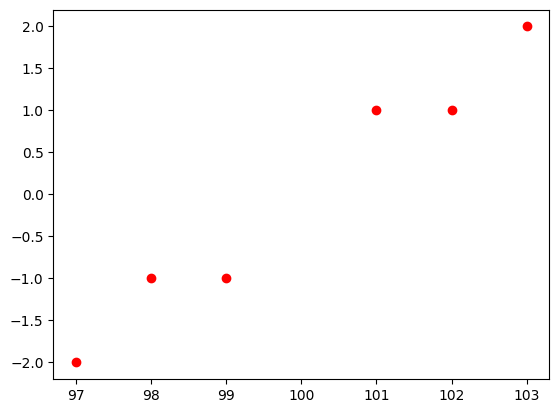

In [14]:
# Reconstruct 100% from the 2 axes/components after PCR
# This is possible because together the 2 axes total 100% explained variance... because the original dataset also has 2 dimensions.
X_reduced_2 = pca_2.inverse_transform(X_trans_2)
print(X_reduced_2)


# The plot of the reconstructed data will look exactly like the original input data.
plt.plot(X_reduced_2[:,0], X_reduced_2[:,1], 'ro')

[[ 98.84002499  -0.75383654]
 [ 98.13695576  -1.21074232]
 [ 96.97698075  -1.96457886]
 [101.15997501   0.75383654]
 [101.86304424   1.21074232]
 [103.02301925   1.96457886]]


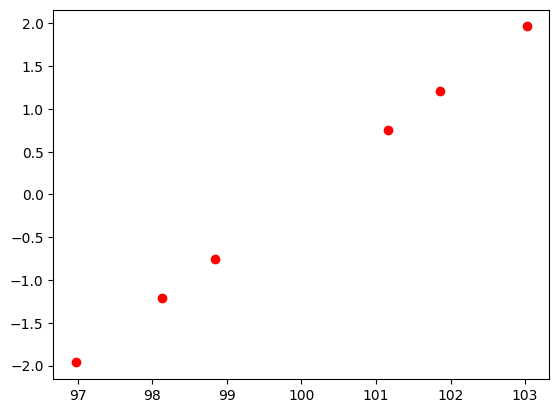

In [15]:
# Reconstruct 99.2% from the 1 axis/component after PCR
X_reduced_1 = pca_1.inverse_transform(X_trans_1)
print(X_reduced_1)

# The plot of the reconstructed data is not exactly like the original input data because some data (0.8%) has been lost.
# Now the data are situated on a single line. This line is the single principal component from PCA where each example had a single "coordinate" along that axis to describe its location.
plt.plot(X_reduced_1[:,0], X_reduced_1[:,1], 'ro')

## II. Visualization of 2D Dataset

In [16]:
X = np.array([[-0.83934975, -0.21160323],
       [ 0.67508491,  0.25113527],
       [-0.05495253,  0.36339613],
       [-0.57524042,  0.24450324],
       [ 0.58468572,  0.95337657],
       [ 0.5663363 ,  0.07555096],
       [-0.50228538, -0.65749982],
       [-0.14075593,  0.02713815],
       [ 0.2587186 , -0.26890678],
       [ 0.02775847, -0.77709049]])

In [17]:
p = figure(title = '10-point scatterplot', x_axis_label = 'x-axis', y_axis_label = 'y-axis') ## Creates the figure object
p.scatter(X[:,0],X[:,1],marker = 'o', color = '#C00000', size = 5) ## Add the scatter plot

## Some visual adjustments
p.grid.visible = False
p.grid.visible = False
p.outline_line_color = None 
p.toolbar.logo = None
p.toolbar_location = None
p.xaxis.axis_line_color = "#f0f0f0"
p.xaxis.axis_line_width = 5
p.yaxis.axis_line_color = "#f0f0f0"
p.yaxis.axis_line_width = 5

## Shows the figure
show(p)

In [18]:
# The below code generates a widget where you can see how different ways of compressing this data into 1-dimensional datapoints will lead to different ways on how the points are spread in this new space. 
# The line generated by PCA is the line that keeps the points as far as possible from each other.
# You can use the slider to rotate the black line through its center and see how the points' projection onto the line will change as we rotate the line.
# NB: There are projections that place different points in almost the same point. And there are projections that keep the points as separated as they were in the plane.

plot_widget()

    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              …

## III. Visualization of a 3D dataset

In [19]:
from lib.pca_utils import random_point_circle, plot_3d_2d_graphs

In [21]:
X = random_point_circle(n = 150)
deb = plot_3d_2d_graphs(X)
deb.update_layout(yaxis2 = dict(title_text = 'test', visible=True))

## IV. Use PCA to better visualize dataset with 1000 features

### Load Data

In [23]:
# Load dataset
# 500 training examples; 1000 features each
df = pd.read_csv("data/toy_dataset.csv")
df.head()

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  27.422157 -29.662712 -23.297163 -15.161935   0.345581   3.706750   
1   3.489482 -19.153551 -14.636424  14.688258  20.114204  13.532852   
2   4.293509  22.691579  -1.045155  -8.740350  12.401082  31.362987   
3  -2.139348  23.158754 -26.241206  19.426465   9.472049   8.453948   
4 -35.251034  27.281816 -29.470282 -21.786865  11.806822  58.655133   

   feature_6  feature_7  feature_8  feature_9  ...  feature_990  feature_991  \
0  -5.507209 -46.992476   5.175469 -47.768145  ...     7.815960    24.320965   
1  34.298084  22.982509  37.938670 -35.648144  ...    11.145527   -38.886603   
2 -18.831206 -35.384557   8.161430 -16.421762  ...    48.190331    -0.503157   
3   0.637211 -26.675984 -43.823329  11.840874  ...   -51.613076    13.278858   
4   5.375230  59.740676 -49.007717 -21.801155  ...     0.010857    20.975655   

   feature_992  feature_993  feature_994  feature_995  feature_996  \
0   -33.987522    22.306088    31.173511    31.264830     8.380699   
1    44.579337    37.308519    29.560535   -10.643331    -6.499263   
2   -21.740678    15.972237     1.122335   -45.473538    10.518065   
3   -44.179281    32.912282     4.805774     3.960836   -15.888356   
4   -21.358371    18.709369    22.362477    41.214565    -7.217724   

   feature_997  feature_998  feature_999  
0   -25.843189    36.706408   -43.480792  
1    19.921666    -3.528982    31.068739  
2    -5.818320   -29.466301   -13.676685  
3    61.384773    33.112334     5.088320  
4    31.173870    37.097532   -27.509420  

[5 rows x 1000 columns]

### Randomly sample to better visualize 

Randomly sample 100 pairwise tuples (x,y) of features, so we can scatter-plot them.

In [24]:
def get_pairs(n = 100):
    from random import randint
    i = 0
    tuples = []
    while i < 100:
        x = df.columns[randint(0,999)]
        y = df.columns[randint(0,999)]
        while x == y or (x,y) in tuples or (y,x) in tuples:
            y = df.columns[randint(0,999)]
        tuples.append((x,y))
        i+=1
    return tuples

pairs = get_pairs()

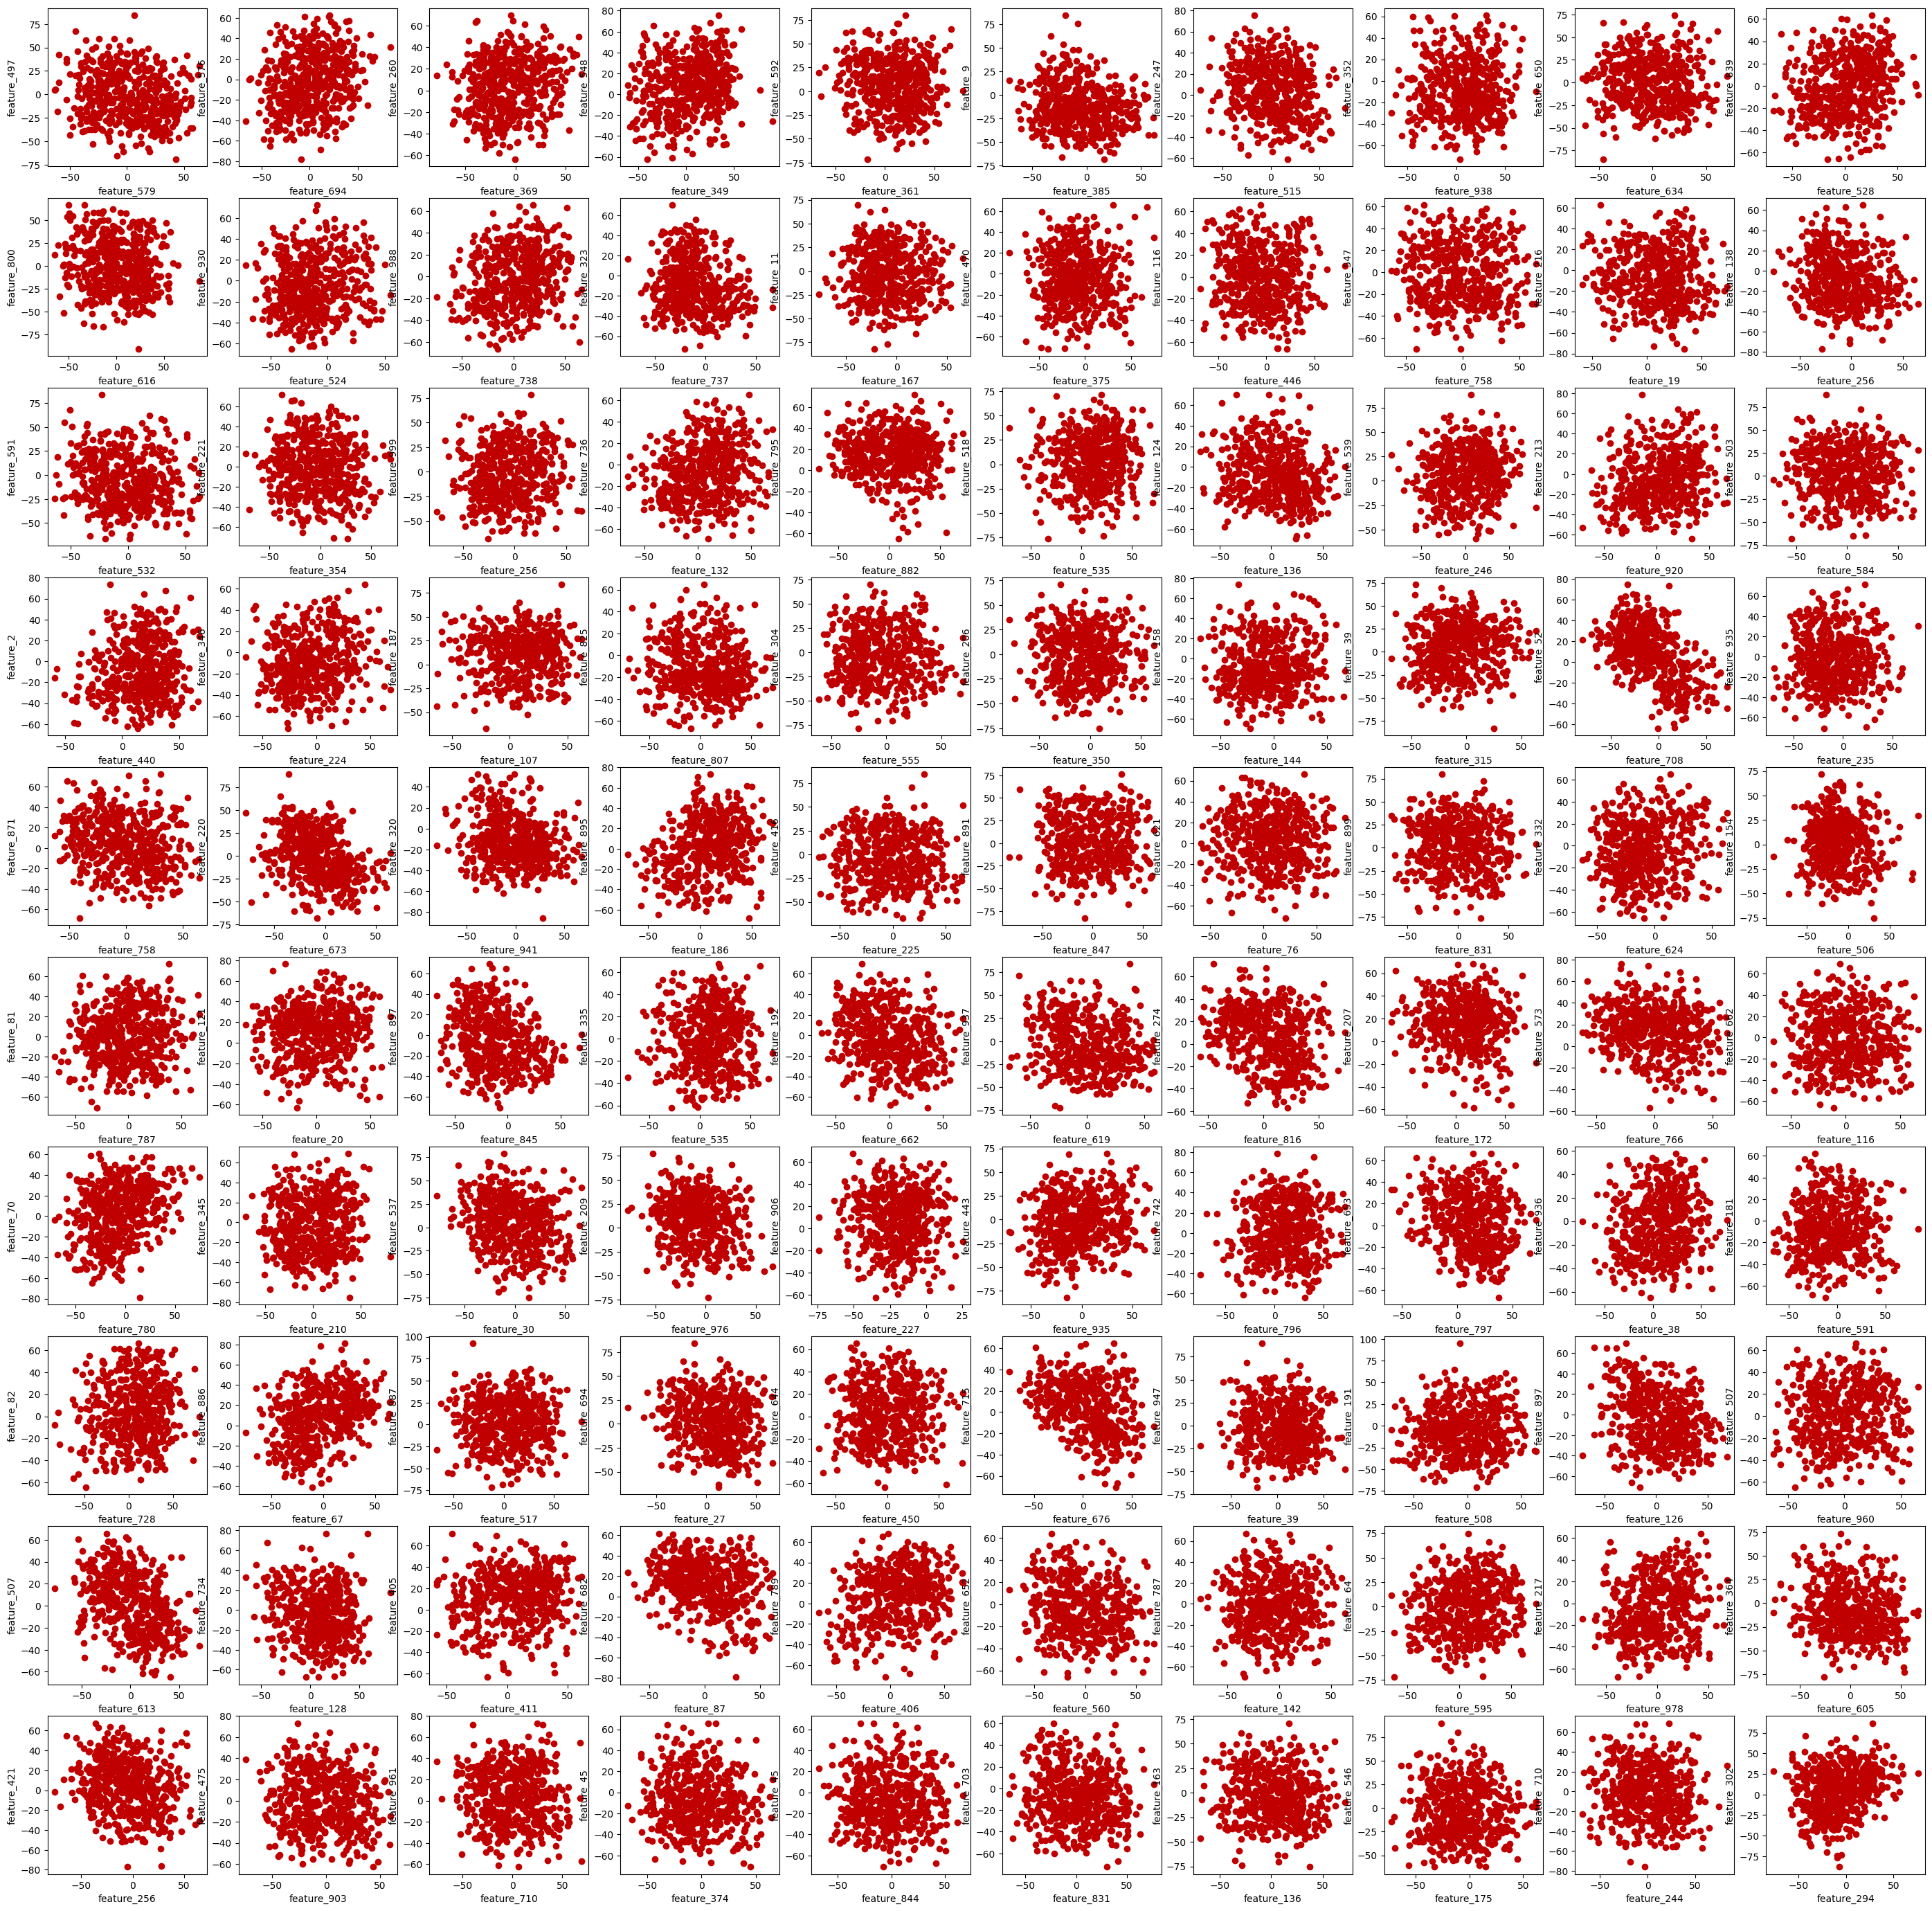

In [26]:
# Plot the pairs
# There's too much information hidden in pairwise features to discern visually. 
# Also, it is not possible to check every combination, due to the high number of features.
fig, axs = plt.subplots(10,10, figsize = (35,35))
i = 0
for rows in axs:
    for ax in rows:
        ax.scatter(df[pairs[i][0]],df[pairs[i][1]], color = "#C00000")
        ax.set_xlabel(pairs[i][0])
        ax.set_ylabel(pairs[i][1])
        i+=1

### Look for linear correlations

In [27]:
# This may take 1 minute to run
corr = df.corr()

In [29]:
# This will show all the features that have correlation > 0.5 in absolute value. 
# It removes the features with correlation == 1 to remove the correlation of a feature with itself.

# The maximum correlation is around   0.631
# The minimum correlation is around  -0.632
# This is not very helpful.
     
mask = (abs(corr) > 0.5) & (abs(corr) != 1)
corr.where(mask).stack().sort_values()

feature_81   feature_657   -0.631294
feature_657  feature_81    -0.631294
feature_313  feature_4     -0.615317
feature_4    feature_313   -0.615317
feature_716  feature_1     -0.609056
                              ...   
feature_792  feature_547    0.620864
feature_35   feature_965    0.631424
feature_965  feature_35     0.631424
feature_395  feature_985    0.632593
feature_985  feature_395    0.632593
Length: 1870, dtype: float64

### Use PCA to reduce from 1000 features to 2 features/axes (lower fidelity)

In [42]:
# Load the PCA object
# Number of components is 2 because we want to reduce to two axes/components.
pca_2 = PCA(n_components = 2)
X_pca_2 = pca_2.fit_transform(df)
df_pca_2 = pd.DataFrame(X_pca_2, columns = ['principal_component_1','principal_component_2'])

In [43]:
# This displays the two resulting features in the header.
df_pca_2.head()

principal_component_1  principal_component_2
0              46.235641              -1.672797
1             210.208758             -84.068249
2              26.352795            -127.895751
3             116.106804            -269.368256
4             110.183605            -279.657306

Text(0.5, 1.0, 'PCA decomposition')

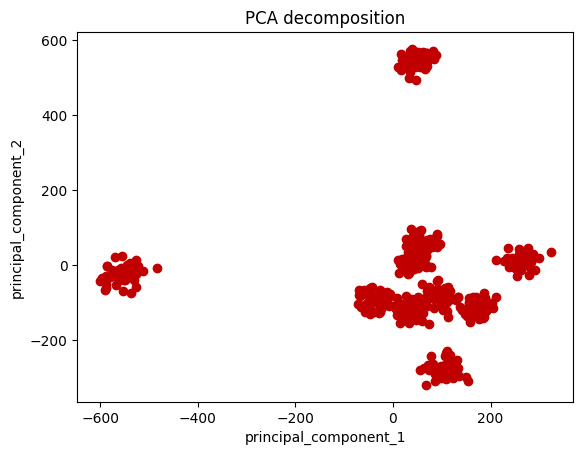

In [44]:
# Plot
# Now we can see well-defined clusters.
plt.scatter(df_pca['principal_component_1'],df_pca_2['principal_component_2'], color = "#C00000")
plt.xlabel('principal_component_1')
plt.ylabel('principal_component_2')
plt.title('PCA decomposition')

In [52]:
# Check the explained variance

print(pca_2.explained_variance_ratio_)

print(sum(pca_2.explained_variance_ratio_))
# Expected value: 0.14572843555106263

# We preserved about 14.6% of the variance in the original dataset.
# That seems low, but it is not bad. By dropping the level of fidelity, we are able to better visualize features of the data.
# We can see roughly 9 clusters. It's difficult to know if the angle is placing some clusters on top of eachother.

[0.07898605 0.06674239]
0.1457284355510626


### Use PCA to reduce from 1000 features to 3 features/axes (higher fidelity)

In [46]:
# Load the PCA object
# Number of components is 3 because we want to reduce to three axes/components.
pca_3 = PCA(n_components = 3).fit(df)
X_t = pca_3.transform(df)
df_pca_3 = pd.DataFrame(X_t,columns = ['principal_component_1','principal_component_2','principal_component_3'])

In [47]:
# This displays the two resulting features in the header.
df_pca_3.head()

principal_component_1  principal_component_2  principal_component_3
0              46.235641              -1.672797              38.410180
1             210.208758             -84.068249            -275.195623
2              26.352795            -127.895751             166.058699
3             116.106804            -269.368256            -286.123911
4             110.183605            -279.657306            -308.823198

In [48]:
# Plot
import plotly.express as px

fig = px.scatter_3d(df_pca_3, x = 'principal_component_1', y = 'principal_component_2', z = 'principal_component_3').update_traces(marker = dict(color = "#C00000"))
fig.show()

In [51]:
# Check the explained variance

print(pca_3.explained_variance_ratio_)

print(sum(pca_3.explained_variance_ratio_))
# Expected value: 0.2080625781609328

# We preserved about 20.8% of the variance in the original dataset.
# This is much higher than the 2D PCA.
# We can now clearly see 10 clusters. 

[0.07898605 0.06674239 0.06233414]
0.2080625781609328
